In [1]:
#Importacion de librerias  pandas, numpy y matplolib respectivamente 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar archivos CSV de México
venecia_shared_room = pd.read_csv("venecia_shared_room.csv")

In [3]:
# Eliminar el símbolo de dólar y la coma, y convertir a tipo float
#mexico_entire_home['price'] = mexico_entire_home['price'].replace(r'[\$,]', '', regex=True).astype(float)
venecia_shared_room['price'] = venecia_shared_room['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HP\AppData\Local\Temp\ipykernel_19388\720689160.py:3: SyntaxWarning: invalid escape sequence '\$'
  venecia_shared_room['price'] = venecia_shared_room['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)


In [4]:
#eliminamos la columna tipo string
#df=df.drop(["abbrev"],axis=1)
columnas_a_eliminar = [
   "calendar_last_scraped","room_type"
]

# Eliminar columnas del DataFrame
venecia_shared_room = venecia_shared_room.drop(columns=columnas_a_eliminar)

In [5]:
venecia_shared_room.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 42 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            28 non-null     float64
 1   host_id                                       28 non-null     int64  
 2   host_acceptance_rate                          28 non-null     float64
 3   host_is_superhost                             28 non-null     int64  
 4   host_listings_count                           28 non-null     int64  
 5   host_total_listings_count                     28 non-null     int64  
 6   host_identity_verified                        28 non-null     int64  
 7   property_type                                 28 non-null     object 
 8   accommodates                                  28 non-null     int64  
 9   bathrooms                                     28 non-null     float

In [8]:
venecia_shared_room['property_type'] = venecia_shared_room['property_type'].astype('category').cat.codes

In [ ]:
#venecia_shared_room.to_csv("venecia_shared_room1.csv")

mexico_entire_home     
PRICE Vs host_acceptance_rate

In [ ]:
#venecia_shared_room['property_type'] = venecia_shared_room['property_type'].astype('category').cat.codes

In [10]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=venecia_shared_room[['host_acceptance_rate']]
Vars_Dep=venecia_shared_room['price']

In [11]:
#Se define model como funcion de regresion lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [12]:
#verificamos la funcion relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [13]:
#Ajustamos

#matrices=letra mayuscula
#vector=letra minusculka
model.fit(X=Vars_Indep, y=Vars_Dep)

LinearRegression()

In [14]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.7104346]),
 'rank_': 1,
 'singular_': array([149.70196582]),
 'intercept_': 183.1902313788548}

Modelo matemático:y=0.7104346 * 183.1902313788548

In [15]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.015282390294963366

In [16]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_shared_room[['host_acceptance_rate']])
y_pred

array([254.23369121, 210.89718071, 253.52325661, 190.29457736,
       254.23369121, 254.23369121, 254.23369121, 227.23717647,
       227.23717647, 227.23717647, 190.29457736, 227.23717647,
       227.23717647, 227.23717647, 227.23717647, 195.26761955,
       254.23369121, 254.23369121, 254.23369121, 254.23369121,
       254.23369121, 254.23369121, 254.23369121, 239.31456464,
       239.31456464, 239.31456464, 239.31456464, 254.23369121])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
venecia_shared_room.insert(0, 'Predicciones', y_pred)
venecia_shared_room

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

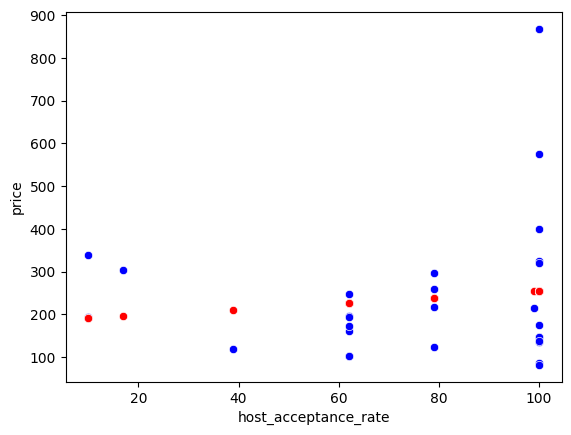

In [18]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=venecia_shared_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="red", data=venecia_shared_room)

In [19]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.015282390294963366

In [20]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.12362196526088463

In [81]:
#sns.pairplot(mexico_entire_home)

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=venecia_shared_room.corr()
Corr_Factors

In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

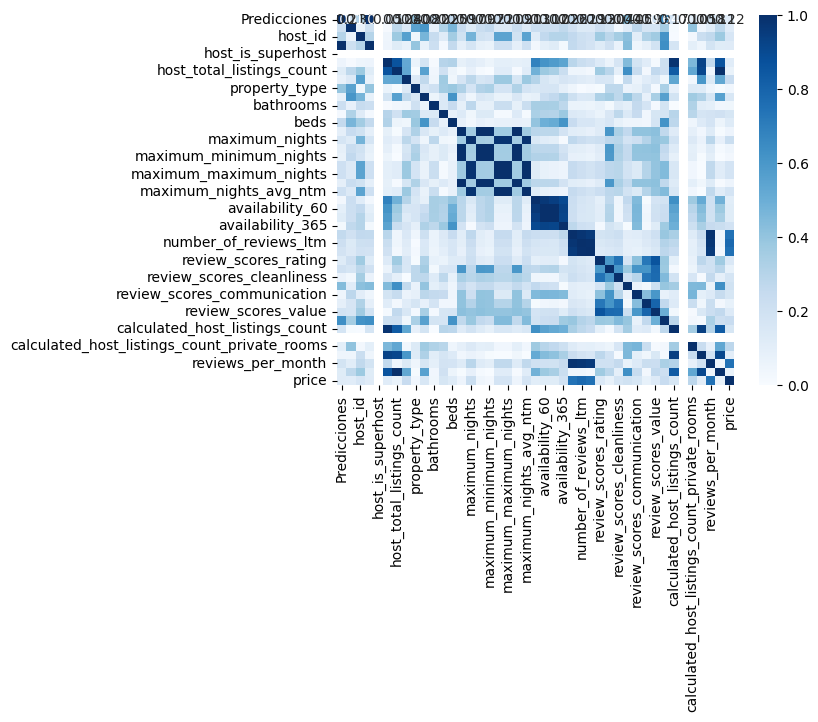

In [23]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“price vs host_is_superhost”

In [24]:
venecia_shared_room1 = pd.read_csv("venecia_shared_room1.csv")

In [25]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]

Vars_Indep=venecia_shared_room1[['host_is_superhost']]
Vars_Dep=venecia_shared_room1['price']

In [26]:
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': 237.10714285714286}

Modelo matemático:y=0 * 237.10714285714286

In [27]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.0

In [28]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_shared_room1[['host_is_superhost']])
y_pred

array([237.10714286, 237.10714286, 237.10714286, 237.10714286,
       237.10714286, 237.10714286, 237.10714286, 237.10714286,
       237.10714286, 237.10714286, 237.10714286, 237.10714286,
       237.10714286, 237.10714286, 237.10714286, 237.10714286,
       237.10714286, 237.10714286, 237.10714286, 237.10714286,
       237.10714286, 237.10714286, 237.10714286, 237.10714286,
       237.10714286, 237.10714286, 237.10714286, 237.10714286])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
venecia_shared_room1.insert(0, 'Predicciones', y_pred)
venecia_shared_room1

<Axes: xlabel='host_is_superhost', ylabel='price'>

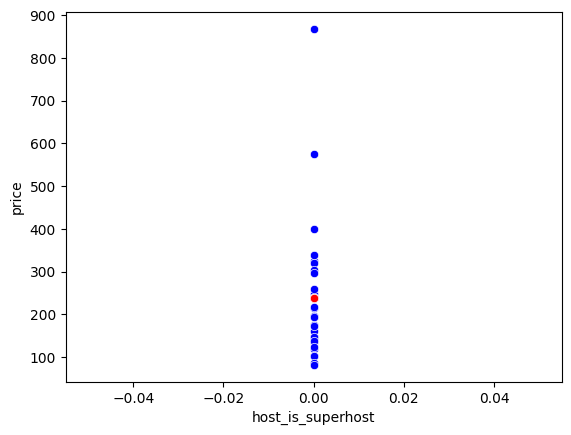

In [30]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=venecia_shared_room1)
sns.scatterplot(x='host_is_superhost', y='Predicciones', color="red", data=venecia_shared_room1)

In [31]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.0

In [32]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.0

In [33]:
venecia_shared_room1['property_type'] = venecia_shared_room1['property_type'].astype('category').cat.codes

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=venecia_shared_room1.corr()
Corr_Factors

In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

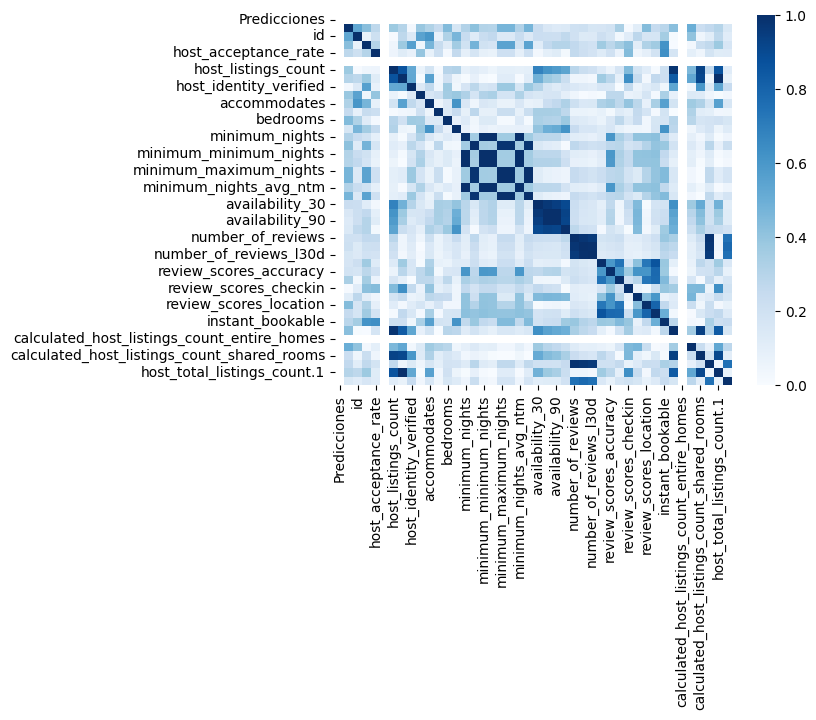

In [36]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“accommodates vs bathrooms” 


In [37]:
venecia_shared_room2 = pd.read_csv("venecia_shared_room1.csv")

In [38]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=venecia_shared_room2[['bathrooms']]
Vars_Dep=venecia_shared_room2['accommodates']

In [39]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.33333333]),
 'rank_': 1,
 'singular_': array([1.53529895]),
 'intercept_': 2.0000000000000004}

Modelo matemático:y=0.33333333 * 2.0000000000000004

In [40]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.003339404978749183

In [41]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_shared_room2[['bathrooms']])
y_pred

array([2.33333333, 2.66666667, 2.33333333, 2.33333333, 2.33333333,
       2.33333333, 2.33333333, 2.33333333, 2.33333333, 2.33333333,
       2.33333333, 2.33333333, 2.33333333, 2.33333333, 2.66666667,
       2.33333333, 2.33333333, 2.33333333, 2.5       , 2.33333333,
       2.33333333, 2.33333333, 2.33333333, 2.33333333, 2.33333333,
       2.33333333, 2.33333333, 2.16666667])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
venecia_shared_room2.insert(0, 'Predicciones', y_pred)
venecia_shared_room2


<Axes: xlabel='bathrooms', ylabel='accommodates'>

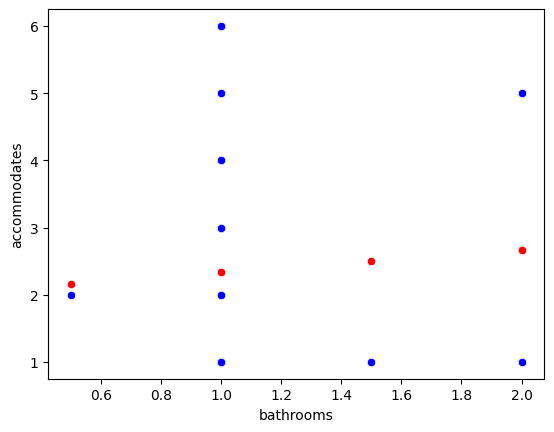

In [43]:

sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=venecia_shared_room2)
sns.scatterplot(x='bathrooms', y='Predicciones', color="red", data=venecia_shared_room2)


In [44]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.003339404978749183

In [45]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.0577875849880334

In [46]:
venecia_shared_room2['property_type'] = venecia_shared_room2['property_type'].astype('category').cat.codes

In [ ]:

#Encontramos todas las correlaciones entre las variables
Corr_Factors=venecia_shared_room2.corr()
Corr_Factors

In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

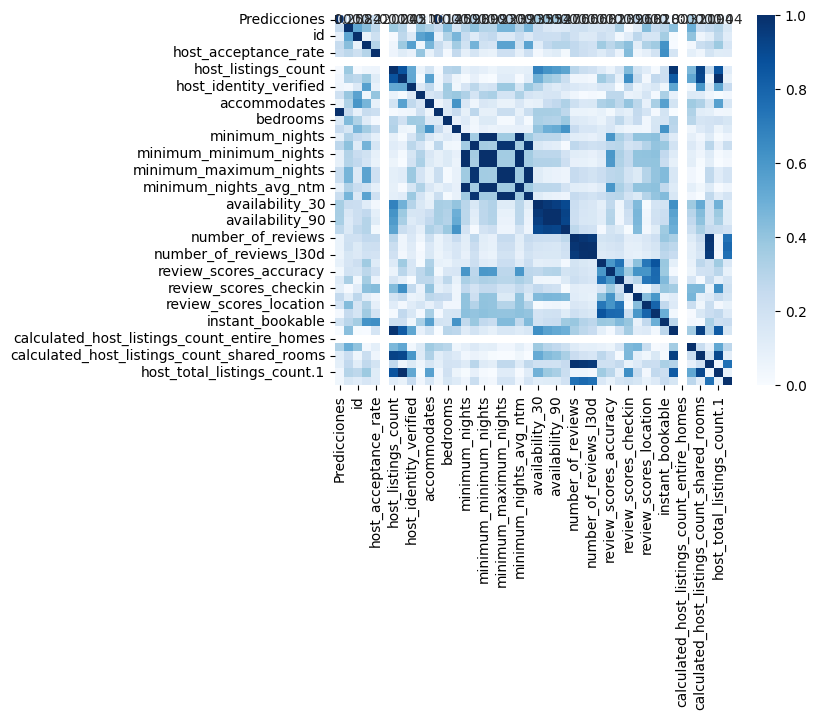

In [49]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

price vs review_scores_cleanliness

In [50]:
venecia_shared_room3 = pd.read_csv("venecia_shared_room1.csv")

In [51]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=venecia_shared_room3[['review_scores_cleanliness']]
Vars_Dep=venecia_shared_room3['price']


In [52]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([91.07105043]),
 'rank_': 1,
 'singular_': array([1.64782432]),
 'intercept_': -170.66348542860598}

Modelo matemático:y=91.07105043 * -170.66348542860598

In [53]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.030427802099839196

In [54]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_shared_room3[['review_scores_cleanliness']])
y_pred

array([250.99547805, 284.69176671, 193.62071628, 241.888373  ,
       193.62071628, 182.69219023, 239.15624149, 222.76345241,
       203.63853183, 210.92421586, 281.95963519, 214.56705788,
       239.15624149, 193.62071628, 230.04913645, 226.40629443,
       262.8347146 , 264.65613561, 261.9240041 , 257.37045158,
       257.37045158, 255.54903057, 206.37066334, 250.99547805,
       241.888373  , 240.066952  , 245.53121502, 284.69176671])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
venecia_shared_room3.insert(0, 'Predicciones', y_pred)
venecia_shared_room3

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

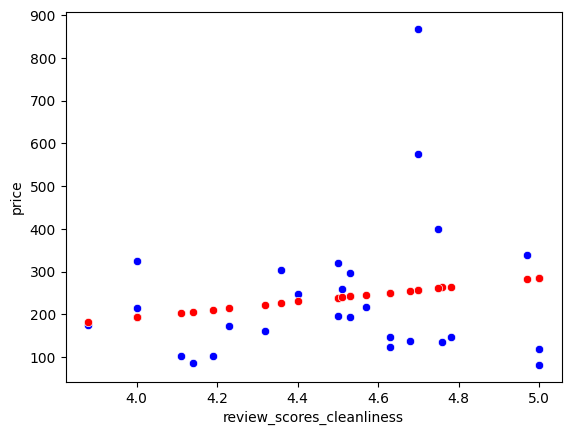

In [56]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=venecia_shared_room3)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones', color="red", data=venecia_shared_room3)

In [57]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.030427802099839196

In [58]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.17443566751051573

In [59]:
venecia_shared_room3['property_type'] = venecia_shared_room3['property_type'].astype('category').cat.codes

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=venecia_shared_room3.corr()
Corr_Factors

In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

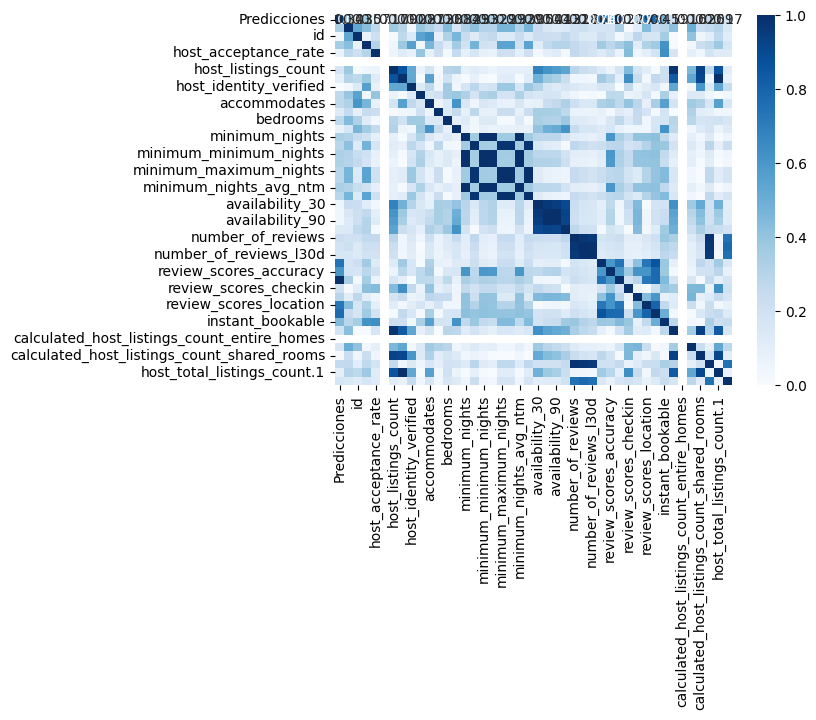

In [62]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“price vs host_identity_verified”


In [63]:
venecia_shared_room4 = pd.read_csv("venecia_shared_room1.csv")

In [64]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=venecia_shared_room4[['host_identity_verified']]
Vars_Dep=venecia_shared_room4['price']


In [65]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([102.63478261]),
 'rank_': 1,
 'singular_': array([2.02660871]),
 'intercept_': 152.8}

Modelo matemático:y=102.63478261 * 152.8


In [66]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)


0.058454374239392703

In [67]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_shared_room4[['host_identity_verified']])
y_pred


array([255.43478261, 152.8       , 255.43478261, 255.43478261,
       255.43478261, 152.8       , 255.43478261, 255.43478261,
       255.43478261, 255.43478261, 255.43478261, 255.43478261,
       255.43478261, 255.43478261, 255.43478261, 152.8       ,
       255.43478261, 255.43478261, 255.43478261, 255.43478261,
       255.43478261, 255.43478261, 152.8       , 255.43478261,
       255.43478261, 255.43478261, 255.43478261, 152.8       ])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
venecia_shared_room4.insert(0, 'Predicciones', y_pred)
venecia_shared_room4


<Axes: xlabel='host_identity_verified', ylabel='price'>

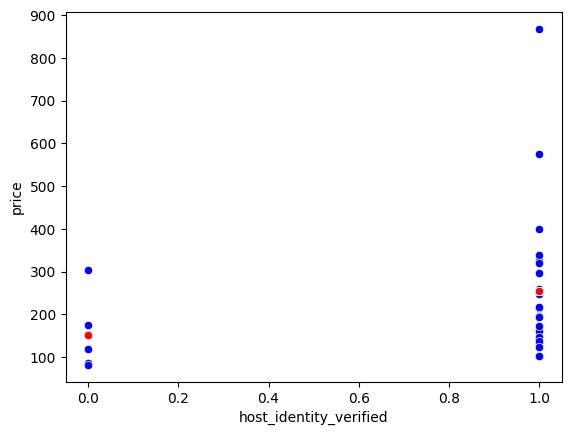

In [69]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=venecia_shared_room4)
sns.scatterplot(x='host_identity_verified', y='Predicciones', color="red", data=venecia_shared_room4)


In [70]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.058454374239392703

In [71]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.24177339439936874

In [72]:
venecia_shared_room4['property_type'] = venecia_shared_room4['property_type'].astype('category').cat.codes

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=venecia_shared_room4.corr()
Corr_Factors


In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

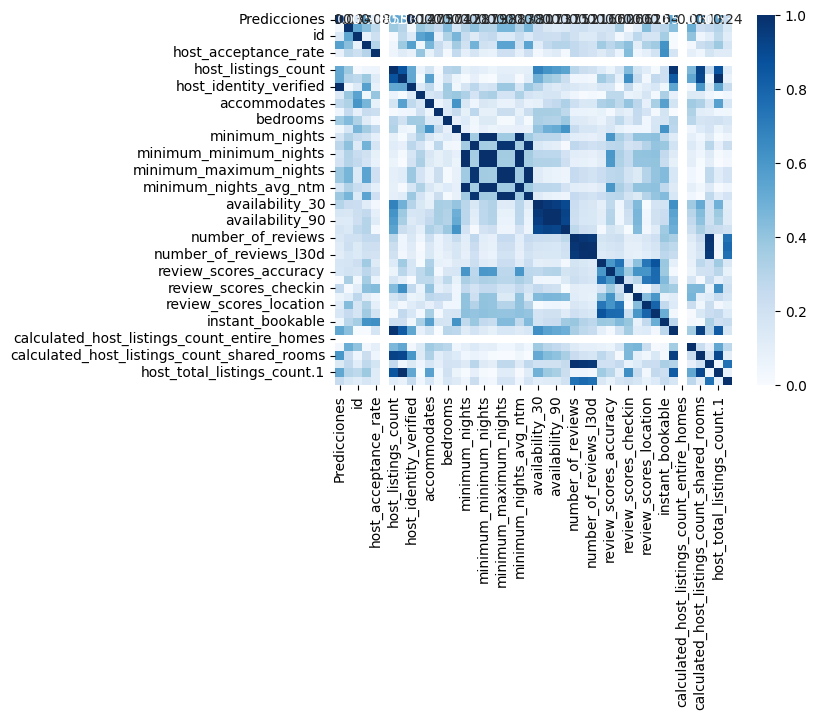

In [75]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“price vs instant_bookable”


In [76]:
venecia_shared_room5 = pd.read_csv("venecia_shared_room1.csv")

In [77]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=venecia_shared_room5[['instant_bookable']]
Vars_Dep=venecia_shared_room5['price']


In [78]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([81.81111111]),
 'rank_': 1,
 'singular_': array([2.53546276]),
 'intercept_': 207.88888888888889}

Modelo matemático:y=81.81111111 * 207.88888888888889

In [79]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.05813358807821656

In [80]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_shared_room5[['instant_bookable']])
y_pred

array([289.7       , 207.88888889, 207.88888889, 207.88888889,
       207.88888889, 207.88888889, 289.7       , 207.88888889,
       207.88888889, 207.88888889, 207.88888889, 207.88888889,
       207.88888889, 207.88888889, 207.88888889, 207.88888889,
       289.7       , 289.7       , 289.7       , 289.7       ,
       289.7       , 289.7       , 289.7       , 207.88888889,
       207.88888889, 207.88888889, 207.88888889, 289.7       ])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
venecia_shared_room5.insert(0, 'Predicciones', y_pred)
venecia_shared_room5


<Axes: xlabel='instant_bookable', ylabel='price'>

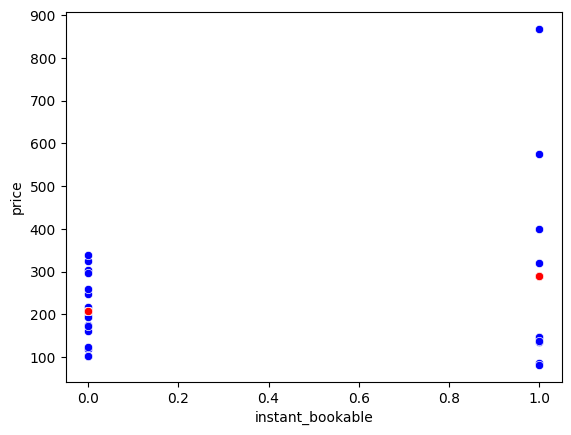

In [82]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=venecia_shared_room5)
sns.scatterplot(x='instant_bookable', y='Predicciones', color="red", data=venecia_shared_room5)


In [83]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.05813358807821656

In [84]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.2411090792114983

In [85]:
venecia_shared_room5['property_type'] = venecia_shared_room5['property_type'].astype('category').cat.codes

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=venecia_shared_room5.corr()
Corr_Factors


In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

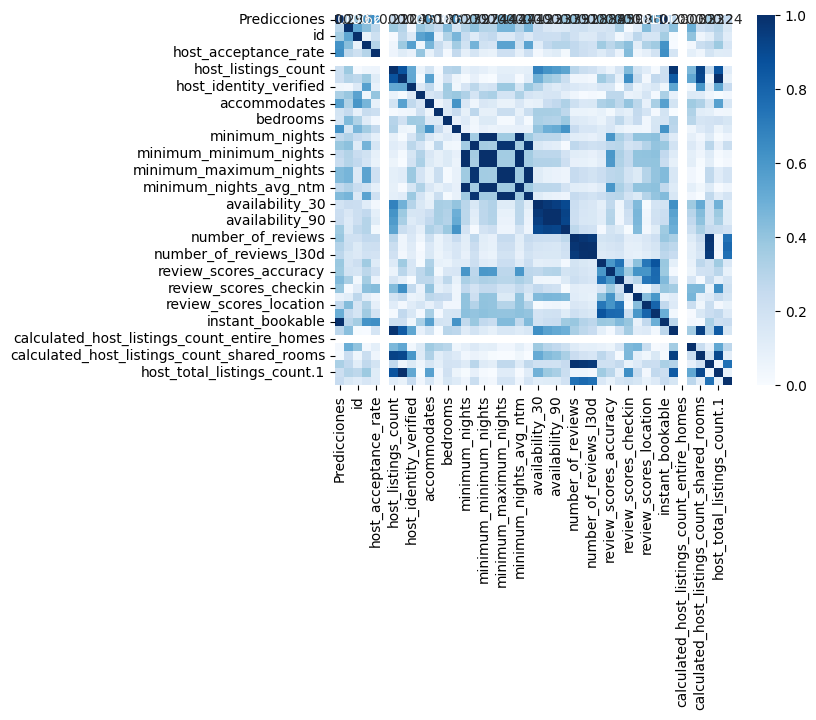

In [88]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map

“Price vs property_type”


In [89]:
venecia_shared_room6 = pd.read_csv("venecia_shared_room1.csv")

In [90]:
venecia_shared_room6['property_type'] = venecia_shared_room6['property_type'].astype('category').cat.codes


In [91]:
#Declaramos las varibales dependientes e independientes para la regresion lineal
#Vars_Indep=df['alcohol', 'speeding´]]
Vars_Indep=venecia_shared_room6[['property_type']]
Vars_Dep=venecia_shared_room6['price']


In [92]:
# Ver categorías únicas de room_type
venecia_shared_room6['property_type'].unique()

array([0, 5, 1, 2, 3, 4], dtype=int8)

In [93]:
venecia_shared_room6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    28 non-null     int64  
 1   id                                            28 non-null     float64
 2   host_id                                       28 non-null     int64  
 3   host_acceptance_rate                          28 non-null     float64
 4   host_is_superhost                             28 non-null     int64  
 5   host_listings_count                           28 non-null     int64  
 6   host_total_listings_count                     28 non-null     int64  
 7   host_identity_verified                        28 non-null     int64  
 8   property_type                                 28 non-null     int8   
 9   accommodates                                  28 non-null     int64

In [94]:
#Ajustamos
model.fit(X=Vars_Indep, y=Vars_Dep)
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([3.30333333]),
 'rank_': 1,
 'singular_': array([9.258201]),
 'intercept_': 226.25333333333333}

Modelo matemático:y=3.30333333 * 226.25333333333333

In [95]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinar
model.score(Vars_Indep,Vars_Dep)

0.0012637061034460606

In [96]:
#Predecimos los valores totalde accidentes a partir de la variable'alcohol'
#y_pred=modal.predict(X=df['alcohol'])
#Predecimos los valores de total de acciones a partir de la variable "alcohol"
y_pred = model.predict(X=venecia_shared_room6[['property_type']])
y_pred

array([226.25333333, 242.77      , 242.77      , 242.77      ,
       229.55666667, 232.86      , 226.25333333, 229.55666667,
       229.55666667, 229.55666667, 242.77      , 229.55666667,
       242.77      , 242.77      , 242.77      , 242.77      ,
       236.16333333, 236.16333333, 236.16333333, 236.16333333,
       236.16333333, 236.16333333, 236.16333333, 242.77      ,
       242.77      , 242.77      , 242.77      , 239.46666667])

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
venecia_shared_room6.insert(0, 'Predicciones', y_pred)
venecia_shared_room6


ValueError: Could not interpret value `Predicciones` for parameter `y`

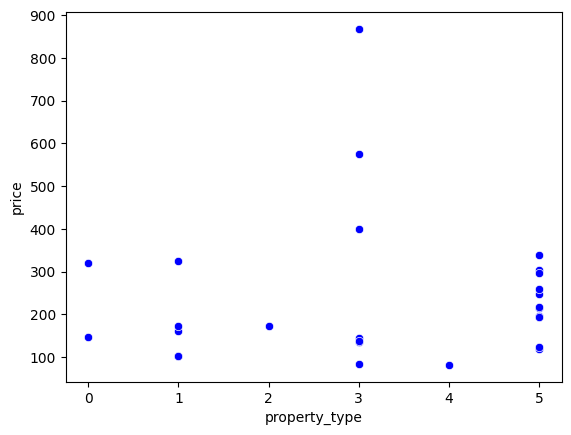

In [97]:
sns.scatterplot(x='property_type', y='price', color="blue", data=venecia_shared_room6)
sns.scatterplot(x='property_type', y='Predicciones', color="red", data=venecia_shared_room6)

In [98]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Vars_Dep)
coef_Deter

0.0012637061034460606

In [99]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.03554864418576411

In [ ]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=venecia_shared_room6.corr()
Corr_Factors


In [ ]:
#Encontramos todas las correlaciones entre las variab
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

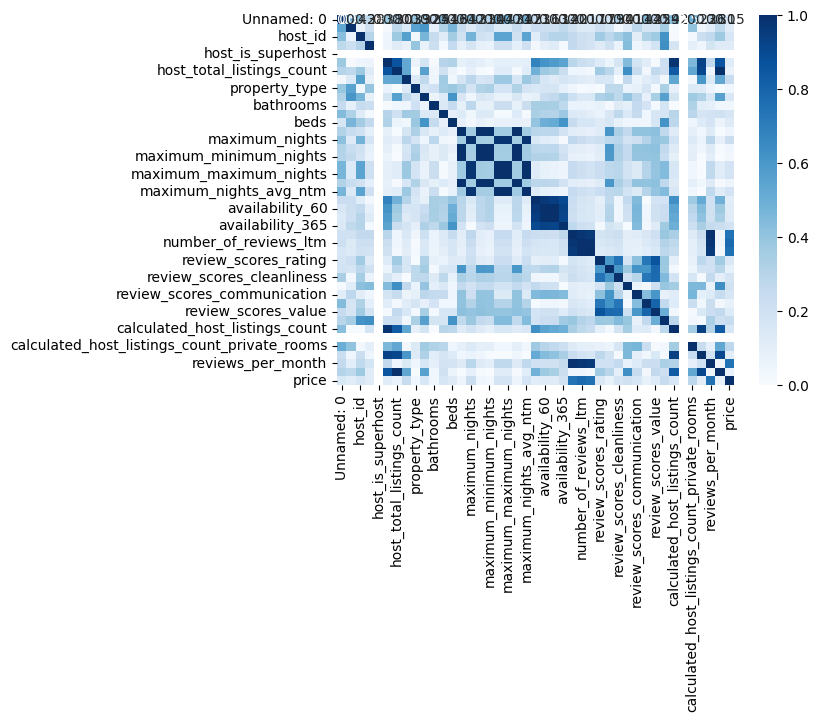

In [102]:
#Graficamos el mapa de calor de los coeficientes de correlacion
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".2f")
Heat_Map